# Week 3 Exercise

Firstly lets import the Tensorlow, Keras and the libraries we need:

In [19]:
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.style 


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.6.0


Now we will load the MNIST dataset directly from Keras:

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# get pixel values from range [0,255] to range [0,1]
train_images=train_images/255.0
test_images=test_images/255.0

Let's plot the first image in the dataset

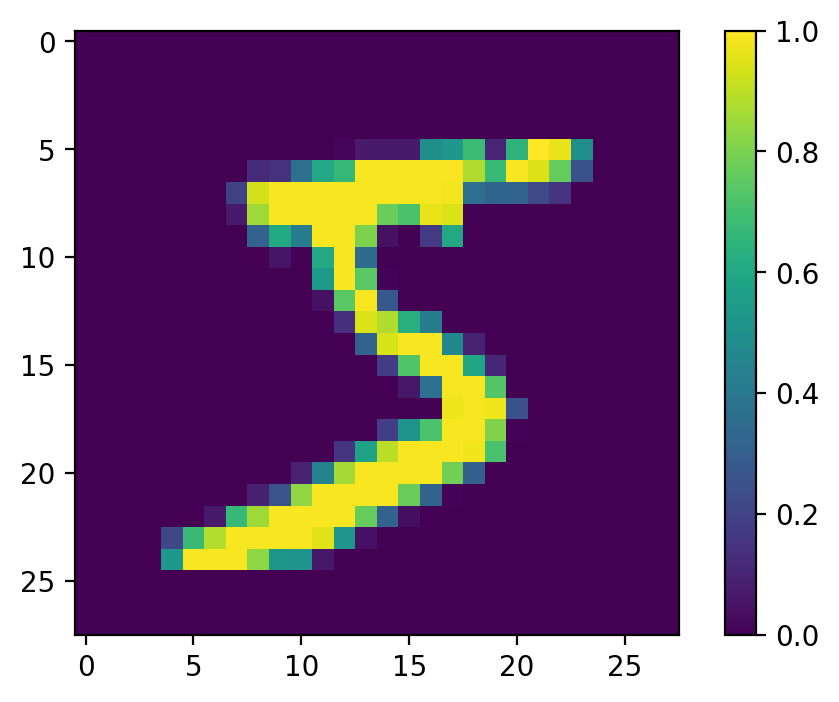

In [20]:
plt.imshow(train_images[0])
plt.colorbar()

### Adding noise to images

Let's now add uniform noise to the images. We will do this by creating a function which adds to the original 28x28 pixels images an array of 784 random numbers also with shape 28x28.

In [5]:
def train_img_with_noise(y_noise):
    '''Returns train images from MNIST dataset with some added random noise from a uniform distribution:
    y_noise: noise values go from 0 to y_noise'''
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()     # import data from MNIST dataset
    train_images=train_images/255.0                                                  # normalise pixel values 

    # looping trough all images in train sample
    for i in range(len(train_images)):
        # create 28 x 28 array of random noise values
        noise_array=np.random.uniform(0.0, y_noise,train_images[i].size).reshape(len(train_images[i]),len(train_images[i]))
        # add noise to the image
        train_images[i]+=noise_array
        
    return train_images/(1+y_noise) # return noisy images, with normalised pixel values

In [6]:
def test_img_with_noise(y_noise):
    '''Returns test images from MNIST dataset with some added random noise from a uniform distribution:
    y_noise: noise values go from 0 to y_noise'''
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()     # import data from MNIST dataset
    test_images=test_images/255.0                                                    # normalise pixel values 

    # looping trough all images in train sample
    for i in range(len(test_images)):
        # create 28 x 28 array of random noise values
        noise_array=np.random.uniform(0.0, y_noise,test_images[i].size).reshape(len(test_images[i]),len(test_images[i]))
        # add noise to the image
        test_images[i]+=noise_array    
 
    return test_images/(1+y_noise) # return noisy images, with normalised pixel values

Let's plot the first image in the dataset with added noise

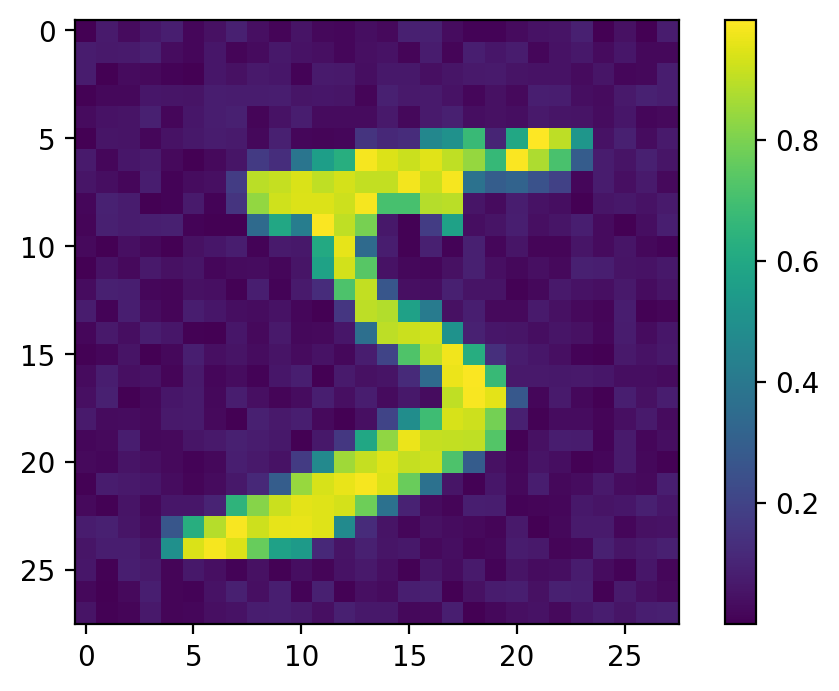

In [33]:
y_noise=0.1
noise_train_images=train_img_with_noise(y_noise)
plt.imshow(noise_train_images[0])
plt.colorbar()

### Building the neural network

Now we will build and train our neural network using Keras.

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # shape of input values, i.e. shape of images (28x28 pixels)
    keras.layers.Dense(128,activation='relu'),   # 128 neurons in first hidden layer, with reLU as activation func.
    keras.layers.Dense(10)                       # 10 output neurons, each corresponding to a digit from 0 to 9
])

In [26]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])

In [27]:
history=model.fit(train_images, train_labels,batch_size=100, epochs=5)  # train the nueral network

Epoch 1/5
600/600 [==============================] - 1s 1ms/step - loss: 0.2944 - accuracy: 0.9083
Epoch 2/5
600/600 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9634
Epoch 3/5
600/600 [==============================] - 1s 1ms/step - loss: 0.0845 - accuracy: 0.9737
Epoch 4/5
600/600 [==============================] - 1s 1ms/step - loss: 0.0699 - accuracy: 0.9776
Epoch 5/5
600/600 [==============================] - 1s 1ms/step - loss: 0.0555 - accuracy: 0.9823


Now we will test our model on the testing sample and check its accuracy.

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)  # test the neural network 

313/313 - 0s - loss: 0.0981 - accuracy: 0.9714


As we can see the accuracy of the model is $\sim 97 \%$

### Testing the neural network on noisy test sample

Now we will test our previously trained network on a noisy test sample, for increasingly higher values of $y_{noise}$. We will then plot the accuracy of the model against values of $y_{noise}$.

In [29]:
test_acc_arr=[]                                       # array for plotting purpose
y_noise_arr=np.linspace(0,0.5,10)                     # 10 y_noise values from 0 to 0.5
for y_noise in y_noise_arr:
    noise_test_images=test_img_with_noise(y_noise)    # generate noisy test images
    # test model for each value of y_noise
    test_loss, test_acc = model.evaluate(noise_test_images,  test_labels, verbose=2)  
    test_acc_arr.append(test_acc)                     

313/313 - 0s - loss: 0.0981 - accuracy: 0.9714
313/313 - 0s - loss: 0.0994 - accuracy: 0.9689
313/313 - 0s - loss: 0.1112 - accuracy: 0.9647
313/313 - 0s - loss: 0.1413 - accuracy: 0.9568
313/313 - 0s - loss: 0.1953 - accuracy: 0.9410
313/313 - 0s - loss: 0.2792 - accuracy: 0.9107
313/313 - 0s - loss: 0.3946 - accuracy: 0.8616
313/313 - 0s - loss: 0.5335 - accuracy: 0.8057
313/313 - 0s - loss: 0.6950 - accuracy: 0.7382
313/313 - 0s - loss: 0.8603 - accuracy: 0.6726


Text(0, 0.5, 'Accuracy')

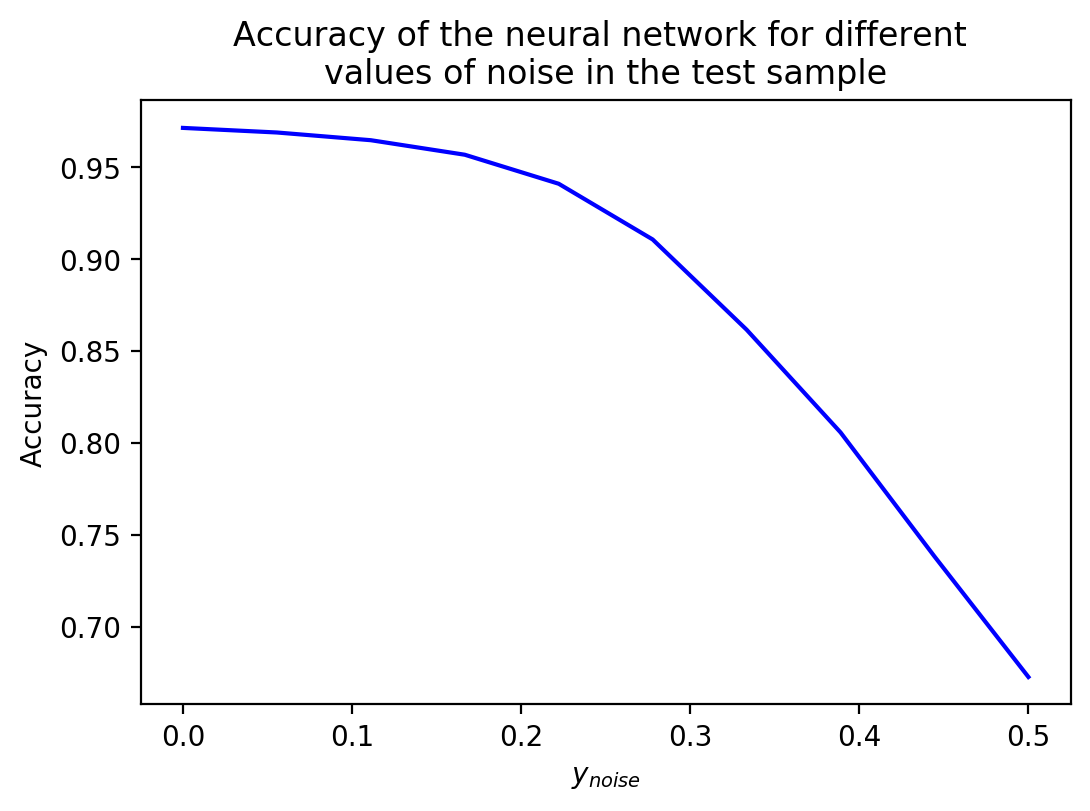

In [31]:
# Plotting accuracy vs y_noise in test sample
fig,ax=plt.subplots()
ax.plot(y_noise_arr,test_acc_arr,color="blue")
ax.set_title("Accuracy of the neural network for different \nvalues of noise in the test sample")
ax.set_xlabel(r"$y_{noise}$")
ax.set_ylabel("Accuracy")

As it can be seen from the plot, the overall accuracy of the model decrease as the level on noise in the test images increases. In particular we can see that when the value of $y_{noise}$ becomes bigger than $0.2$, the accuracy of the neural network decreases more quickly.

Since the model was trained on images without any external noise, we expected to see the accuracy dropping with an increasing value of $y_{noise}$. This is because, as the noise increases, it becomes progressively harder for the neural network to identify similarities between the original images it was trained on and the nosy test images. Therefore its predicting ability, which is measured through the accuracy, is negatively affected.

### Adding noise to train sample

Now we will start adding random noise also to the train sample. Each time we will train our model with a progressively more noisy train sample and analyse its accuracy. We will plot Accuracy vs $y_{test, noise}$ for different values of $y_{train, noise}$.

In [14]:
test_acc_3D=[]                                            # array for storing and plotting accuracy values 
y_noise_arr=np.linspace(0,0.5,10)                         # 10 y_noise values from 0 to 0.5

i=0                                                       # initialise iteration count
for train_noise in y_noise_arr:
    i+=1
    print(f"\n---------------------------Iteration {i}/10-------------------------------\n")
    
    # Generate train images with noise
    noise_train_images=train_img_with_noise(train_noise)
    
    # train model on train images with noise
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
    ])
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(lr=1.0),
              metrics=['accuracy'])
    history=model.fit(noise_train_images, train_labels,batch_size=100, epochs=5)
    
    test_acc_arr=[]                                       # array for storing and plotting accuracy values 
    for test_noise in y_noise_arr:
        
        # test model on test sample with noise
        noise_test_images=test_img_with_noise(test_noise)
        test_loss, test_acc = model.evaluate(noise_test_images,  test_labels, verbose=2)
        test_acc_arr.append(test_acc)
    test_acc_3D.append(test_acc_arr)


---------------------------Iteration 1/10-------------------------------



/Users/umbertoborso/opt/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
600/600 [==============================] - 1s 1ms/step - loss: 0.3247 - accuracy: 0.8998
Epoch 2/5
600/600 [==============================] - 1s 1ms/step - loss: 0.1234 - accuracy: 0.9628
Epoch 3/5
600/600 [==============================] - 1s 1ms/step - loss: 0.0945 - accuracy: 0.9707
Epoch 4/5
600/600 [==============================] - 1s 1ms/step - loss: 0.0743 - accuracy: 0.9769
Epoch 5/5
600/600 [==============================] - 1s 1ms/step - loss: 0.0625 - accuracy: 0.9802
313/313 - 0s - loss: 0.0990 - accuracy: 0.9721
313/313 - 0s - loss: 0.0950 - accuracy: 0.9723
313/313 - 0s - loss: 0.1024 - accuracy: 0.9707
313/313 - 0s - loss: 0.1272 - accuracy: 0.9638
313/313 - 0s - loss: 0.1745 - accuracy: 0.9523
313/313 - 0s - loss: 0.2592 - accuracy: 0.9240
313/313 - 0s - loss: 0.3771 - accuracy: 0.8781
313/313 - 0s - loss: 0.5222 - accuracy: 0.8077
313/313 - 0s - loss: 0.6799 - accuracy: 0.7450
313/313 - 0s - loss: 0.8352 - accuracy: 0.6848

---------------------------Iterati

313/313 - 0s - loss: 2.3029 - accuracy: 0.1028

---------------------------Iteration 9/10-------------------------------

Epoch 1/5
600/600 [==============================] - 1s 1ms/step - loss: 2.3236 - accuracy: 0.1225
Epoch 2/5
600/600 [==============================] - 1s 1ms/step - loss: 2.3021 - accuracy: 0.1086
Epoch 3/5
600/600 [==============================] - 1s 1ms/step - loss: 2.3038 - accuracy: 0.1078
Epoch 4/5
600/600 [==============================] - 1s 1ms/step - loss: 2.3036 - accuracy: 0.1073
Epoch 5/5
600/600 [==============================] - 1s 1ms/step - loss: 2.3028 - accuracy: 0.1079
313/313 - 0s - loss: 2.2009 - accuracy: 0.2298
313/313 - 0s - loss: 2.2540 - accuracy: 0.1712
313/313 - 0s - loss: 2.2832 - accuracy: 0.1382
313/313 - 0s - loss: 2.2977 - accuracy: 0.1214
313/313 - 0s - loss: 2.3029 - accuracy: 0.1145
313/313 - 0s - loss: 2.3042 - accuracy: 0.1134
313/313 - 0s - loss: 2.3044 - accuracy: 0.1135
313/313 - 0s - loss: 2.3044 - accuracy: 0.1135
313/313

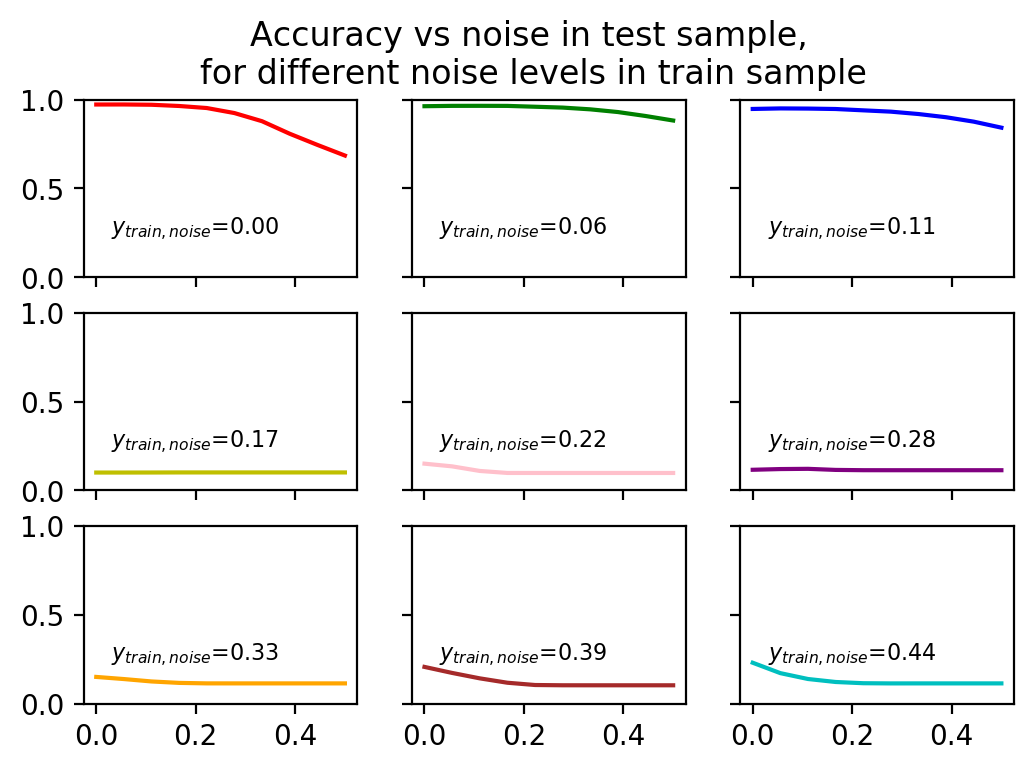

In [23]:
# Plotting instructions to visualise accuracy of the model with different values of y_train_noise and y_test_noise

# Create subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3)
fig.suptitle('Accuracy vs noise in test sample, \nfor different noise levels in train sample')

i=0
colors=['r', 'g', 'b', 'y','pink','purple','orange','brown','c','m']
for ax in fig.get_axes():  # Looping trough each subplot
    ax.label_outer()
    ax.set_ylim(0.0,1)
    ax.plot(y_noise_arr, test_acc_3D[i],color=colors[i])
    ax.text(0.1, 0.2, ('$y_{train,noise}$'+'={0:0.2f}'.format(y_noise_arr[i])),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=8)
    i+=1

In the above plots we can see the trend of accuracy (y-axis) vs $y_{test, noise}$ (x-axis) for different values of $y_{train, noise}$. 

From what we saw in the previous graph, we would expect to see better accuracy for lower values of noise, both in train and test samples. However we can see that when we introduce random noise in the train sample this hypothesis is not correct. In particular we can see that the best model among the ones displayed in the plots, i.e. the one that is the best at identifying (test) images with different levels of noise, or the one with the highest value of accuracy over the widest range of $y_{test,values}$, is not the one with trained on the original images without noise, but instead the one trained with a noise of $y_{train, noise}=0.06$. 

The model with $y_{train, noise}=0.06$, which accuracy is represented by the green line in the plots, is the most consistent in terms making correct predictions when test on a wide range of $y_{test, noise}$. This means that, contrarily to our original hypothesis, the introduction of random noise in the train sample can prove to be beneficial in terms of performance of the model, since it can improve its ability to correctly identify noisy (test) images.

However note that this is the case only for relatively small values of $y_{train, noise}$. In particular when the train noise becomes $>11\%$ the accuracy of the model drops very quickly towards 0. This is because the neural network cannot "learn" from very noisy training images, meaning it becomes progressively harder to identify patterns in training images as the noise increases.

Text(0.5, 0, 'Accuracy')

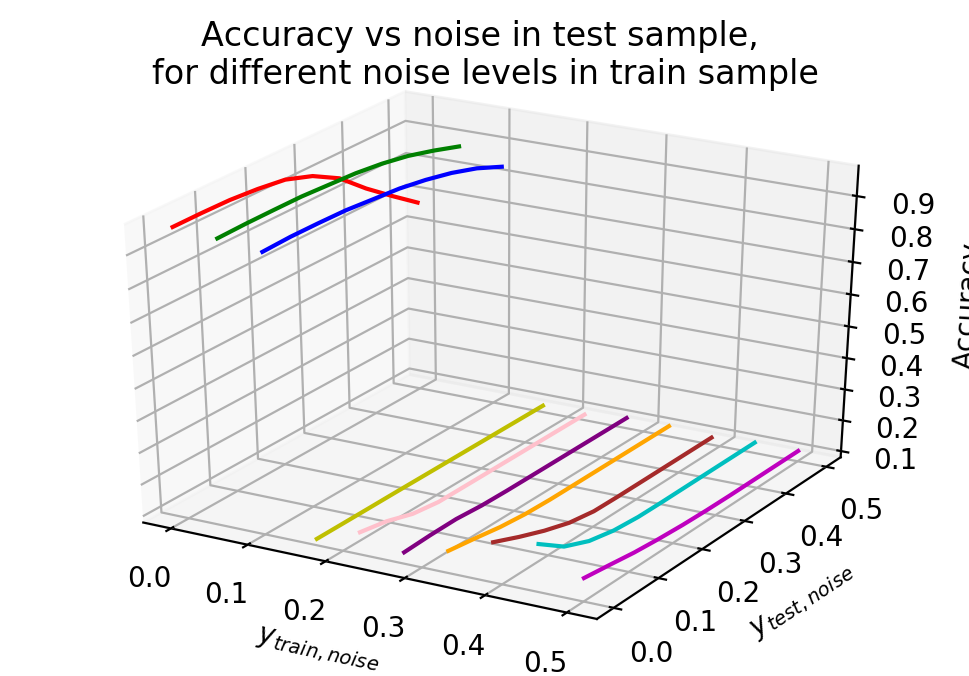

In [24]:
from cycler import cycler
from mpl_toolkits import mplot3d


plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y','pink','purple','orange','brown','c','m']) ))
fig = plt.figure()
ax = plt.axes(projection='3d')

x=y_noise_arr
y=y_noise_arr
z=test_acc_3D[0]

for c in range(len(x)):
    arr=[]
    z=test_acc_3D[c]
    X=x[c]
    for i in range(len(y)):
            element=[X,y[i],z[i]]
            arr.append(element)
    arr=np.array(arr)        
    ax.plot3D(arr[:,0], arr[:,1], arr[:,2])
    
ax.set_title("Accuracy vs noise in test sample, \nfor different noise levels in train sample")
ax.set_xlabel(r"$y_{train,noise}$")
ax.set_ylabel(r"$y_{test,noise}$")
ax.set_zlabel("Accuracy")  

This 3D visualization may help identifying how noise in the train images influences the accuracy of the neural network. In particular we can see that the model represented by the green line, corresponding to a value of $y_{train, noise}=0.06$, has an accuracy which never gets below $90\%$ for values of $y_{test, noise}$ ranging from $0$ to $50\%$. Therefore to maximise the performance, i.e. to keep a high accuracy for (test) images with noise up to $50\%$, a train noise $5\%<y_{train, noise}<10\%$ is recommended.
